[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yousef\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Training and evaluating LogisticRegression...

--- LogisticRegression Results ---
Best parameters found:
{'classifier__C': 10}
Accuracy: 0.9766816143497757

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



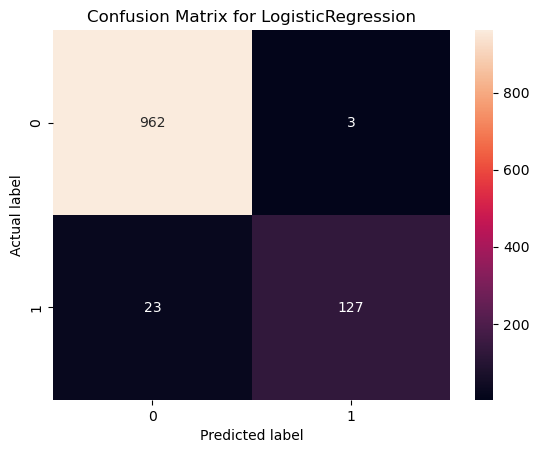


Training and evaluating DecisionTreeClassifier...

--- DecisionTreeClassifier Results ---
Best parameters found:
{'classifier__max_depth': 30}
Accuracy: 0.9668161434977578

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       965
           1       0.92      0.83      0.87       150

    accuracy                           0.97      1115
   macro avg       0.95      0.91      0.93      1115
weighted avg       0.97      0.97      0.97      1115



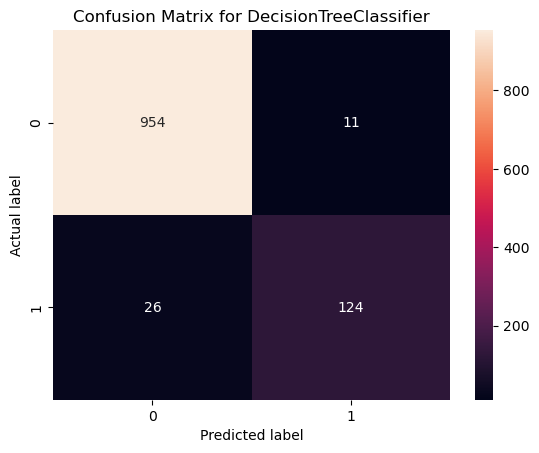


Training and evaluating RandomForestClassifier...

--- RandomForestClassifier Results ---
Best parameters found:
{'classifier__n_estimators': 300}
Accuracy: 0.97847533632287

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



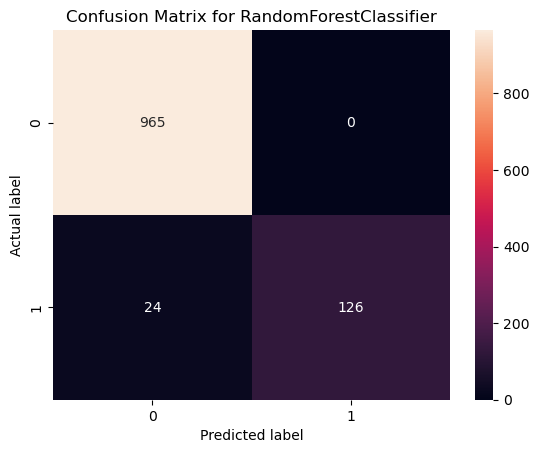


Training and evaluating SVC...

--- SVC Results ---
Best parameters found:
{'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Accuracy: 0.9811659192825112

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



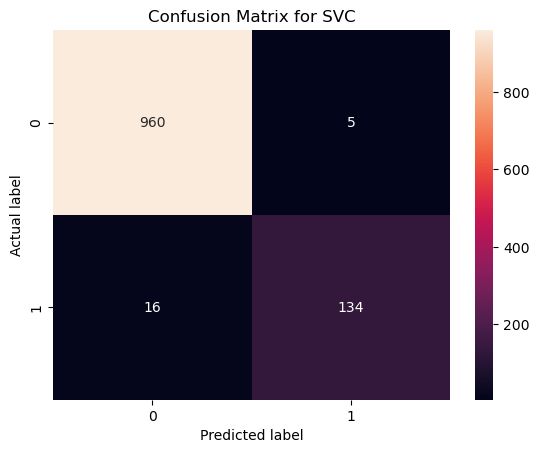


Training and evaluating KNeighborsClassifier...

--- KNeighborsClassifier Results ---
Best parameters found:
{'classifier__metric': 'euclidean', 'classifier__n_neighbors': 1, 'classifier__weights': 'uniform'}
Accuracy: 0.9551569506726457

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       1.00      0.67      0.80       150

    accuracy                           0.96      1115
   macro avg       0.98      0.83      0.89      1115
weighted avg       0.96      0.96      0.95      1115



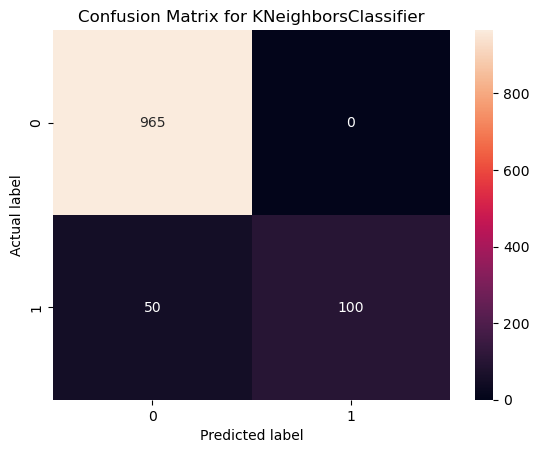


Training and evaluating GradientBoostingClassifier...

--- GradientBoostingClassifier Results ---
Best parameters found:
{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200}
Accuracy: 0.9695067264573991

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.98      0.79      0.87       150

    accuracy                           0.97      1115
   macro avg       0.97      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



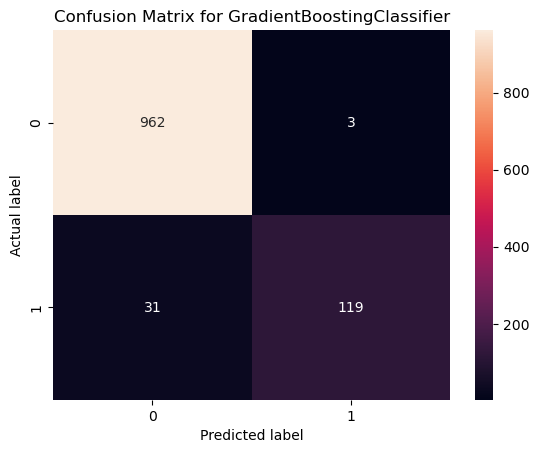


Done training and evaluating all models.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline

from nltk.corpus import stopwords
import string
import nltk

# Download NLTK stopwords
nltk.download('stopwords')

# Load the DataFrame 'df' from 'spam.csv' or another CSV file
df = pd.read_csv('spam.csv', encoding='latin-1')

# Drop unnecessary columns and rename ones being kept
df = df[['v1', 'v2']]
df.columns = ['Label', 'Text']

# Convert labels to binary
df['Label'] = df['Label'].map({'ham': 0, 'spam': 1})

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Label'], test_size=0.2, random_state=42)

# Define a TfidfVectorizer for use in the pipeline
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))

# List of classifiers and their associated parameters for hyperparameter tuning
classifiers = [
    # ('ClassifierName', Classifier(), GridSearchCV parameters)
    ('LogisticRegression', LogisticRegression(solver='liblinear'), {'classifier__C': [0.01, 0.1, 1, 10]}),
    ('DecisionTreeClassifier', DecisionTreeClassifier(), {'classifier__max_depth': [10, 20, 30, None]}),
    ('RandomForestClassifier', RandomForestClassifier(n_estimators=100), {'classifier__n_estimators': [100, 200, 300]}),
    ('SVC', SVC(), {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf'], 'classifier__gamma': ['scale', 'auto']}),
    ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=3), {'classifier__n_neighbors': np.arange(1, 11), 'classifier__weights': ['uniform', 'distance'], 'classifier__metric': ['euclidean', 'manhattan']}),
    ('GradientBoostingClassifier', GradientBoostingClassifier(n_estimators=100), {'classifier__n_estimators': [50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 1]})
]

for name, classifier, parameters in classifiers:
    print(f"\nTraining and evaluating {name}...")
   
    try:
        # Create a pipeline
        pipeline = Pipeline([
            ('tfidf', tfidf_vectorizer),
            ('classifier', classifier)
        ])

        # Perform grid search to find best parameters
        grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        print(f'\n--- {name} Results ---')
        print('Best parameters found:')
        print(grid_search.best_params_)
        
        # Make predictions using best found parameters
        y_pred = grid_search.predict(X_test)
        
        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy: {accuracy}\n')
        print('Classification Report:')
        print(classification_report(y_test, y_pred))
        
        # Display confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d')
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.title(f'Confusion Matrix for {name}')
        plt.show()

    # Error handling within loop
    except Exception as e:
        print(f"An error occurred when training {name}: {str(e)}")

print("\nDone training and evaluating all models.")